**Loading Dataset**

In [1]:
import pandas as pd
df = pd.read_csv("Tweets.csv")

In [2]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**Printing Dataset**

In [4]:
tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [5]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [6]:
tweet_df['text'] = tweet_df['text'].str.replace('@VirginAmerica', '')
tweet_df['text'] = tweet_df['text'].str.replace('@AmericanAir', '')


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Finding the positive tweets**

In [8]:
pos=tweet_df.loc[df["airline_sentiment"]=='positive']
print(pos)

                                                    text airline_sentiment
1       plus you've added commercials to the experien...          positive
6       yes, nearly every time I fly VX this “ear wor...          positive
8        @virginamerica Well, I didn't…but NOW I DO! :-D          positive
9       it was amazing, and arrived an hour early. Yo...          positive
11      I &lt;3 pretty graphics. so much better than ...          positive
...                                                  ...               ...
14623   Love the new planes for the JFK-LAX run.  May...          positive
14625   Flight 236 was great. Fantastic cabin crew. A...          positive
14628  Thank you. “: @jlhalldc Customer Relations wil...          positive
14630                                     Thanks! He is.          positive
14635   thank you we got on a different flight to Chi...          positive

[2363 rows x 2 columns]


**Removing stopwords from positive tweets reviews using NLTK stopwords**

In [9]:
pos['text'] = pos['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
print(pos)

                                                    text airline_sentiment
1            plus added commercials experience... tacky.          positive
6      yes, nearly every time I fly VX “ear worm” won...          positive
8        @virginamerica Well, I didn't…but NOW I DO! :-D          positive
9           amazing, arrived hour early. You're good me.          positive
11     I &lt;3 pretty graphics. much better minimal i...          positive
...                                                  ...               ...
14623  Love new planes JFK-LAX run. Maybe one day I o...          positive
14625  Flight 236 great. Fantastic cabin crew. A+ lan...          positive
14628  Thank you. “: @jlhalldc Customer Relations rev...          positive
14630                                     Thanks! He is.          positive
14635                thank got different flight Chicago.          positive

[2363 rows x 2 columns]


**Finding the negative tweets**

In [11]:
neg=tweet_df.loc[df["airline_sentiment"]=='negative']
print(neg)

                                                    text airline_sentiment
3       it's really aggressive to blast obnoxious "en...          negative
4               and it's a really big bad thing about it          negative
5       seriously would pay $30 a flight for seats th...          negative
15                        SFO-PDX schedule is still MIA.          negative
17       I flew from NYC to SFO last week and couldn'...          negative
...                                                  ...               ...
14631   thx for nothing on getting us out of the coun...          negative
14633   my flight was Cancelled Flightled, leaving to...          negative
14634                      right on cue with the delays👌          negative
14636   leaving over 20 minutes Late Flight. No warni...          negative
14638   you have my money, you change my flight, and ...          negative

[9178 rows x 2 columns]


**Removing stopwords from negative tweets using NLTK stopwords**

In [12]:
neg['text'] = neg['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(neg)

                                                    text airline_sentiment
3      really aggressive blast obnoxious "entertainme...          negative
4                                   really big bad thing          negative
5      seriously would pay $30 flight seats playing. ...          negative
15                           SFO-PDX schedule still MIA.          negative
17     I flew NYC SFO last week fully sit seat due tw...          negative
...                                                  ...               ...
14631  thx nothing getting us country back US. Broken...          negative
14633  flight Cancelled Flightled, leaving tomorrow m...          negative
14634                                  right cue delays👌          negative
14636  leaving 20 minutes Late Flight. No warnings co...          negative
14638  money, change flight, answer phones! Any sugge...          negative

[9178 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Wordcloud for positive tweets**

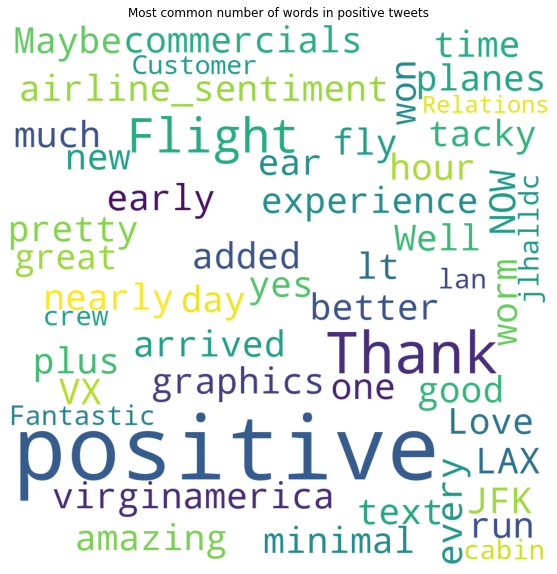

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(background_color='white' ,width=1000,height=1000,max_words=50).generate(str(pos))
plt.rcParams['figure.figsize']=(10,10)
plt. title ("Most common number of words in positive tweets")
plt.axis( 'off')
plt.imshow(wordcloud)

**Wordcloud for negative tweets**

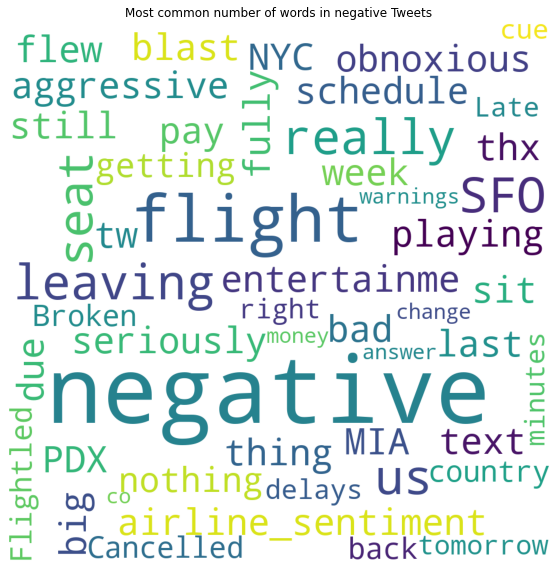

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(background_color='white' ,width=1000,height=1000,max_words=50).generate(str(neg))
plt.rcParams['figure.figsize']=(10,10)
plt. title ("Most common number of words in negative Tweets")
plt.axis( 'off')
plt.imshow(wordcloud)

**Mapping of positive : 1 and negative : 0**

In [15]:
tweet_df.loc[tweet_df["airline_sentiment"]=="negative","airline_sentiment",]=0
tweet_df.loc[tweet_df["airline_sentiment"]=="positive","airline_sentiment",]=1

In [16]:
X = tweet_df["text"]
Y = tweet_df["airline_sentiment"]

In [17]:
print(X)
print(Y)

1         plus you've added commercials to the experien...
3         it's really aggressive to blast obnoxious "en...
4                 and it's a really big bad thing about it
5         seriously would pay $30 a flight for seats th...
6         yes, nearly every time I fly VX this “ear wor...
                               ...                        
14633     my flight was Cancelled Flightled, leaving to...
14634                        right on cue with the delays👌
14635     thank you we got on a different flight to Chi...
14636     leaving over 20 minutes Late Flight. No warni...
14638     you have my money, you change my flight, and ...
Name: text, Length: 11541, dtype: object
1        1
3        0
4        0
5        0
6        1
        ..
14633    0
14634    0
14635    1
14636    0
14638    0
Name: airline_sentiment, Length: 11541, dtype: object


**Splitting the data for training and testing**: 80% for Training and 20% for Testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

In [19]:
print(X.shape)
print(X_test.shape)
print(X_train.shape)

(11541,)
(2309,)
(9232,)


**vectorization of Tweets using TF-IDF Vectorization Technique**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase="True")

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features= feature_extraction.transform(X_test)
Y_train=Y_train.astype("int")
Y_test=Y_test.astype("int")
print(X_train_features)

  (0, 6066)	0.22495614188142946
  (0, 9641)	0.19059007483446933
  (0, 4192)	0.3628113764996129
  (0, 10794)	0.30016645112588136
  (0, 5952)	0.39698960044627957
  (0, 4509)	0.4035738670624179
  (0, 4529)	0.3859866699244956
  (0, 8472)	0.30283243844946345
  (0, 4356)	0.3286331525529463
  (0, 5681)	0.14890470500832134
  (1, 9526)	0.8187730182295336
  (1, 8996)	0.5741173613637718
  (2, 4581)	0.31891222669647884
  (2, 5216)	0.1934881077094902
  (2, 7914)	0.3957582727500671
  (2, 7479)	0.30281047797620736
  (2, 4403)	0.2091705322203366
  (2, 3499)	0.294875438085724
  (2, 9042)	0.4159851484532374
  (2, 2518)	0.4707900965597399
  (2, 7981)	0.27226123540262
  (2, 10128)	0.11411210814484204
  (3, 2891)	0.4048766441291271
  (3, 4609)	0.4048766441291271
  (3, 9824)	0.2511788613733502
  :	:
  (9229, 6204)	0.43571246671447034
  (9229, 2890)	0.36482659080743607
  (9229, 4393)	0.21563119635122532
  (9229, 9231)	0.26718528399933644
  (9229, 1449)	0.23712978225553488
  (9229, 2457)	0.17970683795421452
 

**Model 1: Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
classifier=model.fit(X_train_features, Y_train)
predict_train=model.predict(X_train_features)
accuracy_train=accuracy_score(Y_train,predict_train)

In [29]:
print("Logistic Regression (Training) : ", accuracy_train)

Logistic Regression (Training) :  0.9250433275563258


In [31]:
predict_test=model.predict(X_test_features)
accuracy_test=accuracy_score(Y_test,predict_test)
print("Logistic Regression (Testing) : ", accuracy_test)

Logistic Regression (Testing) :  0.8921611087050672


In [32]:
from sklearn.metrics import confusion_matrix
pred=classifier.predict(X_train_features)
print("confusion metrics:\n", confusion_matrix(Y_train,pred))

confusion metrics:
 [[7294   54]
 [ 638 1246]]


**Model 2: Multinomial Naive Bayes**

In [33]:
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()
classifier2=model2.fit(X_train_features, Y_train)
predict_train2=model2.predict(X_train_features)
accuracy_train2=accuracy_score(Y_train,predict_train2)
print("Multinomial Naive Baise (Training) :", accuracy_train2)

Multinomial Naive Baise (Training) : 0.8783578856152513


In [34]:
predict_test2=model2.predict(X_test_features)
accuracy_test2=accuracy_score(Y_test,predict_test2)
print("Multinomial Naive Baise (Testing) :",accuracy_test2)

Multinomial Naive Baise (Testing) : 0.8306626245127761


In [35]:
pred=classifier2.predict(X_train_features)
print("confusion metrics:\n", confusion_matrix(Y_train,pred))

confusion metrics:
 [[7346    2]
 [1121  763]]


**Model 3: Support vector Machine**

In [26]:
from sklearn import svm
model3= svm.SVC()
classifier3=model3.fit(X_train_features, Y_train)
predict_train3=model3.predict(X_train_features)
accuracy_train3=accuracy_score(Y_train,predict_train3)
print("Support Vector Machine (Training) :",accuracy_train3)

Support Vector Machine (Training) : 0.9872183708838822


In [27]:
predict_test3=model3.predict(X_test_features)
accuracy_test3=accuracy_score(Y_test,predict_test3)
print("Support Vector Machine (Testing) :", accuracy_test3)

Support Vector Machine (Testing) : 0.8930272845387613


In [36]:
pred=classifier3.predict(X_train_features)
print("confusion metrics:\n", confusion_matrix(Y_train,pred))

confusion metrics:
 [[7338   10]
 [ 108 1776]]
